Import Data and Libraries

In [95]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

full_data = pd.read_csv('/Users/riowombacher/DATA1030/rideshare_price_predictor/data/full_data.csv')

EDA

In [96]:
print(full_data.head())
print(full_data.shape)
print(full_data.columns)

                                     id     timestamp  hour  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type    product_id          name  price  distance  surge_multiplier  \
0     Lyft     lyft_line        Shared    5.0      0.44               1.0   
1   

In [97]:
print(full_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                693071 non-null  object 
 1   timestamp         693071 non-null  float64
 2   hour              693071 non-null  int64  
 3   datetime          693071 non-null  object 
 4   timezone          693071 non-null  object 
 5   source            693071 non-null  object 
 6   destination       693071 non-null  object 
 7   cab_type          693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
 10  price             637976 non-null  float64
 11  distance          693071 non-null  float64
 12  surge_multiplier  693071 non-null  float64
 13  temperature       693071 non-null  float64
 14  short_summary     693071 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 79.3+ MB
None


In [98]:
full_data.duplicated().any()

False

In [99]:
print(full_data['timezone'].nunique())
print(full_data['id'].nunique())

1
693071


In [100]:
full_data['product_id'].value_counts()

product_id
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft_luxsuv                             51235
lyft                                    51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: count, dtype: int64

In [101]:
full_data['name'].value_counts()

name
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lux Black XL    51235
Lyft            51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: count, dtype: int64

ID and Timestamp are just unique identifiers so we can drop them. Product id seems to be a worse form of the name variable so drop that.  All rides are in Boston so we can drop timezone.

In [102]:
updated_data = full_data.drop(['id', 'timestamp', 'timezone', 'product_id'], axis = 1)

Identify null values and what to do with them

In [103]:
null_counts = updated_data.isnull().sum()
null_count = null_counts[null_counts > 0]
print(null_count)
#Price is the only column with null values 
# check these rows out to see if they can be imputed with some value or they have to be deleted

price    55095
dtype: int64


In [104]:
null_pct = np.round((null_count.values[0] / updated_data.shape[:1] * 100).item(), 2)
print(f'{null_pct}' + '% of the data is null')

7.95% of the data is null


In [105]:
nulls = updated_data[updated_data['price'].isnull()]
nulls.head()

,hour,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary
18,14,2018-12-01 14:13:04,North End,West End,Uber,Taxi,NaN,1.11,1.0,36.99,Partly Cloudy
31,23,2018-12-02 23:52:56,Beacon Hill,South Station,Uber,Taxi,NaN,2.48,1.0,48.83,Overcast
40,20,2018-11-29 20:38:05,North Station,Fenway,Uber,Taxi,NaN,2.94,1.0,42.50,Partly Cloudy
60,20,2018-12-13 20:10:16,North End,West End,Uber,Taxi,NaN,1.16,1.0,33.15,Mostly Cloudy
69,13,2018-11-30 13:08:03,North End,Beacon Hill,Uber,Taxi,NaN,2.67,1.0,31.80,Clear


In [106]:
nulls['name'].value_counts()

name
Taxi    55095
Name: count, dtype: int64

In [107]:
#Get rid of null values because they are taxi rides so we are not interested in them
updated_data = updated_data.dropna()
print(updated_data.shape)

(637976, 11)


Check for duplicate rows

In [108]:
duplicate_rows = updated_data[updated_data.duplicated(keep=False)]

# Print out the duplicate rows
duplicate_rows.sort_values(by = ['datetime', 'destination'])

,hour,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary
383363,5,2018-11-26 05:14:01,Fenway,West End,Uber,WAV,10.5,2.72,1.0,41.99,Overcast
616863,5,2018-11-26 05:14:01,Fenway,West End,Uber,WAV,10.5,2.72,1.0,41.99,Overcast
482113,6,2018-11-26 06:16:16,Haymarket Square,Financial District,Uber,Black SUV,26.5,0.99,1.0,41.83,Overcast
482114,6,2018-11-26 06:16:16,Haymarket Square,Financial District,Uber,Black,16.0,0.99,1.0,41.83,Overcast
545215,6,2018-11-26 06:16:16,Haymarket Square,Financial District,Uber,Black,16.0,0.99,1.0,41.83,Overcast
...,...,...,...,...,...,...,...,...,...,...,...
543005,16,2018-12-18 16:10:12,Beacon Hill,Boston University,Uber,UberXL,15.0,2.27,1.0,28.58,Partly Cloudy
30859,17,2018-12-18 17:05:08,Theatre District,Haymarket Square,Uber,UberX,8.5,1.61,1.0,30.78,Clear
432613,17,2018-12-18 17:05:08,Theatre District,Haymarket Square,Uber,UberX,8.5,1.61,1.0,30.78,Clear
276653,19,2018-12-18 19:00:16,Boston University,Theatre District,Uber,UberX,10.5,2.98,1.0,32.34,Clear


Need to get rid of the duplicates, can keep the first observation because they are exact duplicates

In [109]:
updated_data = updated_data.drop_duplicates()
len(updated_data)

637036

Lose 940 rows due to removing duplicates

**Now lets check the distributions of our variables**

In [110]:
updated_data['datetime'] = pd.to_datetime(updated_data['datetime'])

In [111]:
max_dates = max(updated_data['datetime'])
min_dates = min(updated_data['datetime'])
print(max_dates)
print(min_dates)

2018-12-18 19:15:10
2018-11-26 03:40:46


<Axes: xlabel='datetime'>

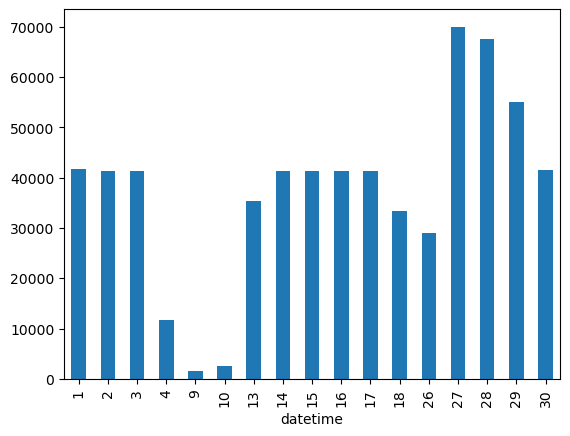

In [112]:
updated_data['datetime'].dt.day.value_counts().sort_index().plot(kind='bar')


All the data takes place between November 26th to December 18th in 2018 in Boston

In [113]:
# #Create a day of the week variable from the datetime variable
updated_data['day_of_week'] = updated_data['datetime'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
updated_data['day_of_week'] = pd.Categorical(updated_data['day_of_week'], categories=days_order, ordered=True)

In [114]:
updated_data.head()

,hour,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,day_of_week
0,9,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,Sunday
1,2,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,Rain,Tuesday
2,1,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,Clear,Wednesday
3,4,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,Friday
4,3,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,Thursday


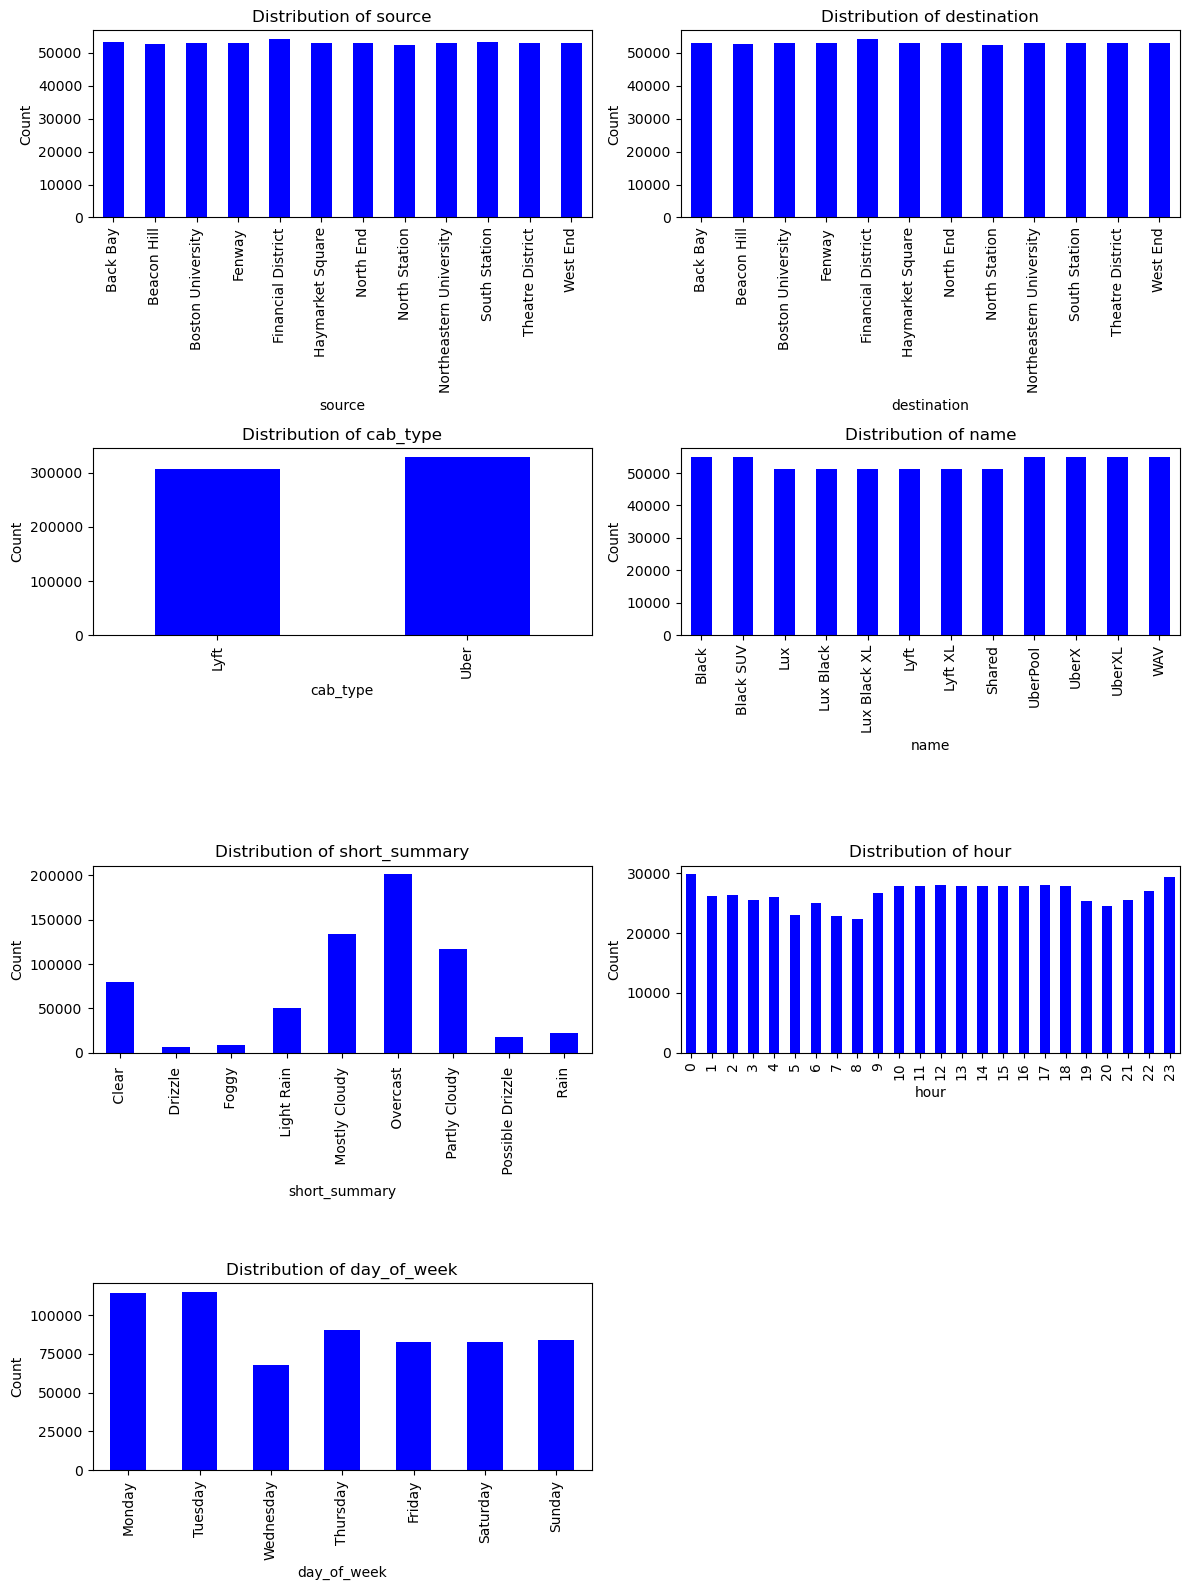

In [115]:
categorical_columns = updated_data.select_dtypes(include='object').columns

# Include 'hour' and 'day_of_week' columns
additional_columns = ['hour', 'day_of_week']

# Combine both lists
columns_to_plot = list(categorical_columns) + additional_columns

n_cols = 2  # Number of columns for subplots
n_rows = (len(columns_to_plot) + 1) // n_cols  # Number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(columns_to_plot):
    updated_data[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()



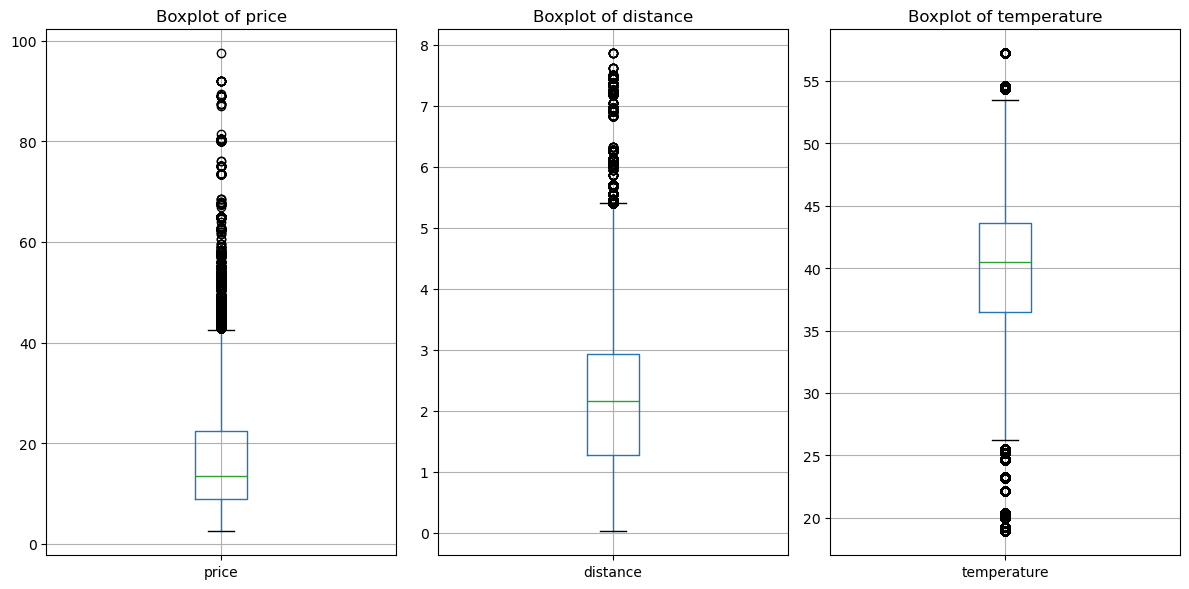

In [116]:
columns_to_plot = ['price', 'distance', 'temperature']
plt.figure(figsize=(12, 6))

# Loop through the columns and create a boxplot for each
for i, col in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1) 
    updated_data.boxplot(column=col)
    plt.title(f'Boxplot of {col}')


plt.tight_layout()
plt.show()


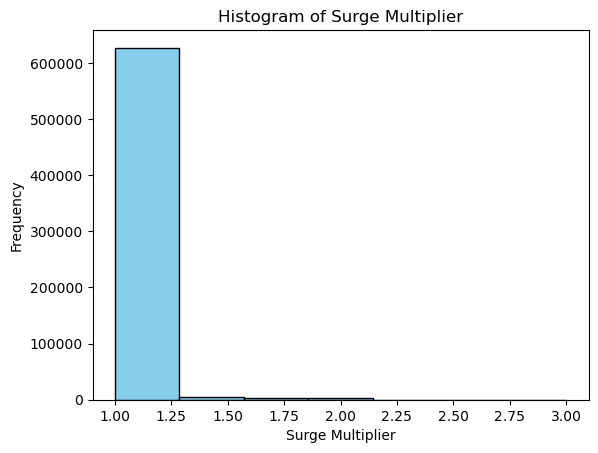

In [117]:
plt.hist(updated_data['surge_multiplier'], bins=updated_data['surge_multiplier'].nunique(), color='skyblue', edgecolor='black')
plt.title('Histogram of Surge Multiplier')
plt.xlabel('Surge Multiplier')
plt.ylabel('Frequency')
plt.show()

In [118]:
updated_data['surge_multiplier'].value_counts()

surge_multiplier
1.00    616061
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: count, dtype: int64

Now lets explore some variable relationships

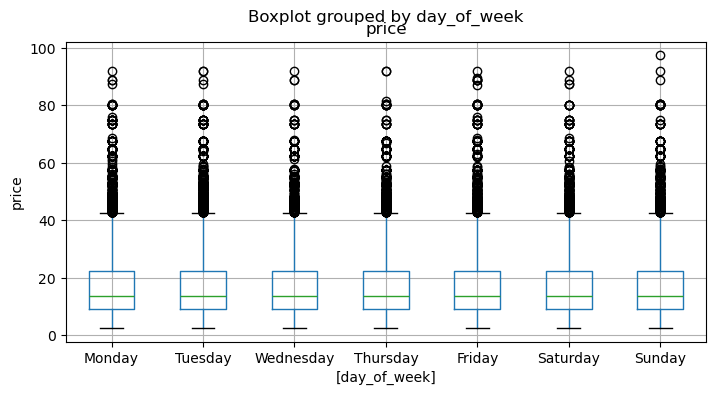

In [119]:
updated_data[['price', 'day_of_week']].boxplot(by = 'day_of_week', figsize =(8,4))
plt.ylabel('price')
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/price_by_dof_boxplot.png", bbox_inches='tight')
plt.show()


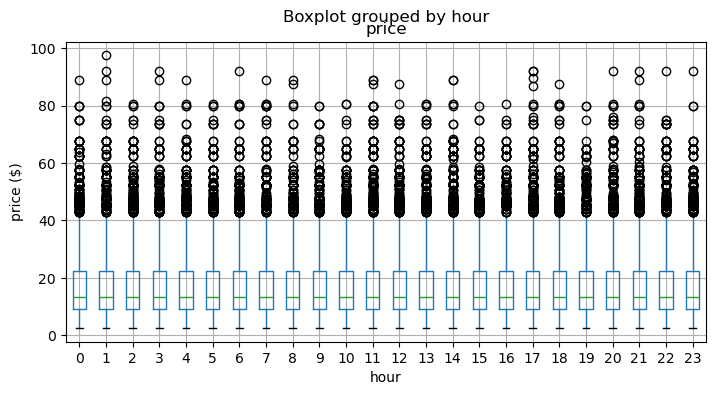

In [130]:
updated_data[['price', 'hour']].boxplot(by = 'hour', figsize =(8,4))
plt.ylabel('price ($)')
plt.xlabel('hour')
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/price_by_hour_boxplot.png", bbox_inches='tight')
plt.show()


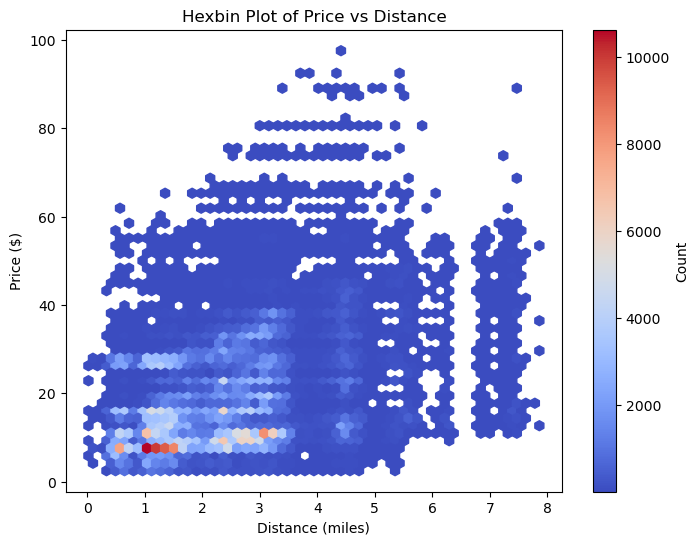

In [121]:
plt.figure(figsize=(8, 6))
plt.hexbin(updated_data['distance'], updated_data['price'], gridsize=50, cmap='coolwarm', mincnt=1)

plt.colorbar(label='Count')
plt.xlabel('Distance (miles)')
plt.ylabel('Price ($)')
plt.title('Hexbin Plot of Price vs Distance')
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/price_vs_dist_hexbin.png", bbox_inches='tight')
plt.show()


In [122]:
updated_data.head()

,hour,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,day_of_week
0,9,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,Sunday
1,2,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,Rain,Tuesday
2,1,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,Clear,Wednesday
3,4,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,Friday
4,3,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,Thursday


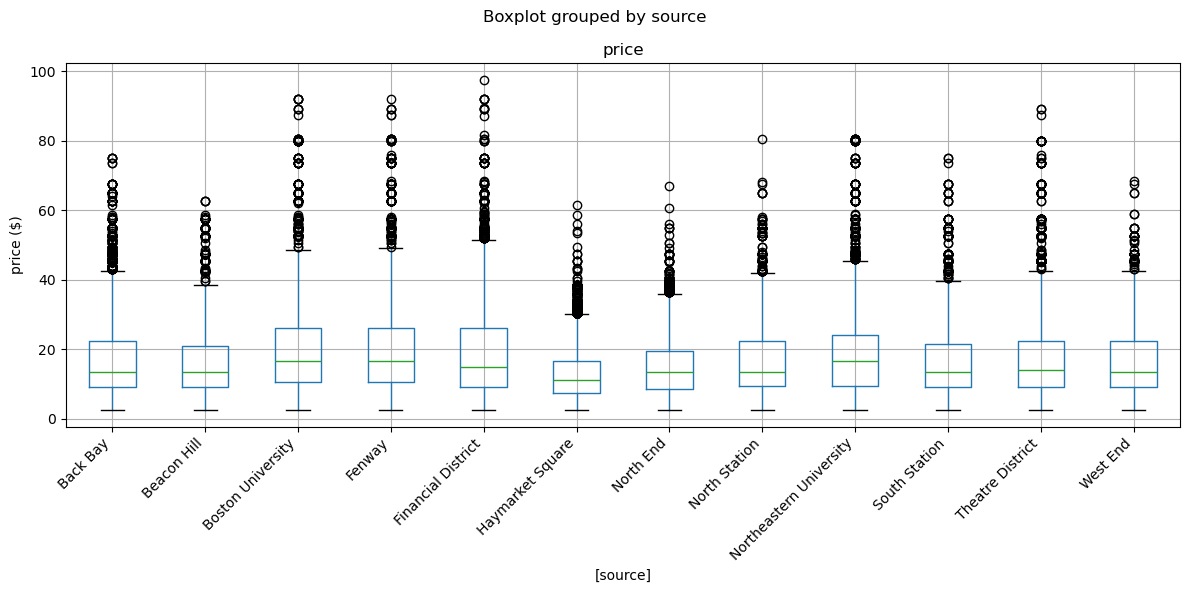

In [123]:
updated_data[['price', 'source']].boxplot(by = 'source', figsize =(12,6))
plt.ylabel('price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

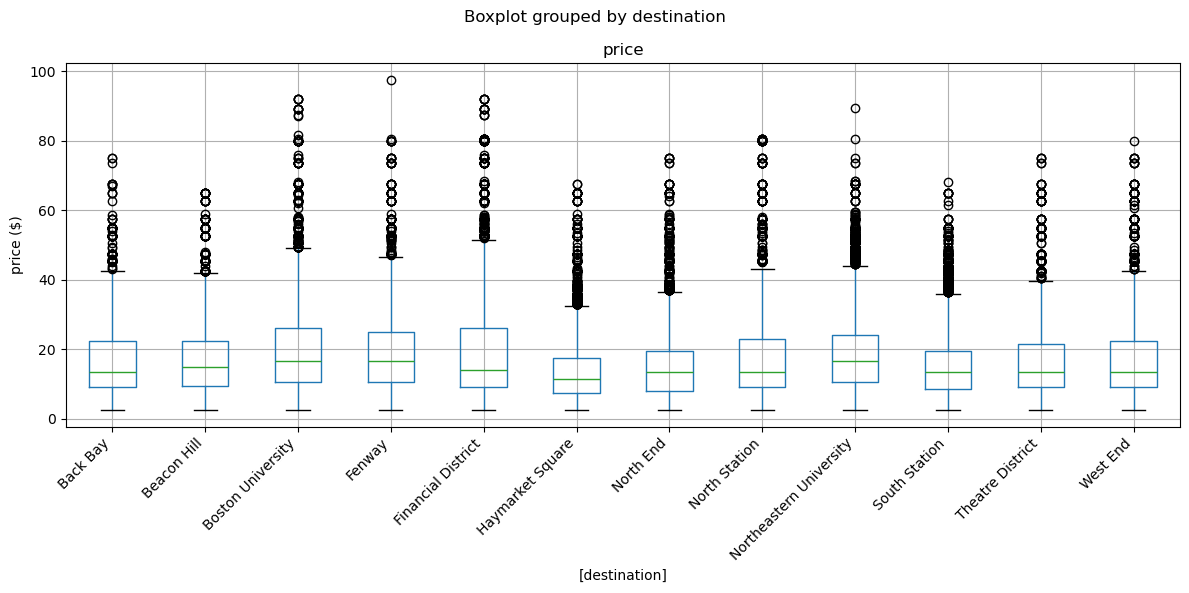

In [124]:
updated_data[['price', 'destination']].boxplot(by = 'destination', figsize =(12,6))
plt.ylabel('price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [125]:
updated_data[['cab_type','name']].value_counts()

cab_type  name        
Uber      UberXL          55005
          Black SUV       54982
          UberPool        54980
          Black           54971
          WAV             54955
          UberX           54952
Lyft      Lux Black XL    51209
          Shared          51205
          Lux             51204
          Lyft            51196
          Lyft XL         51189
          Lux Black       51188
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

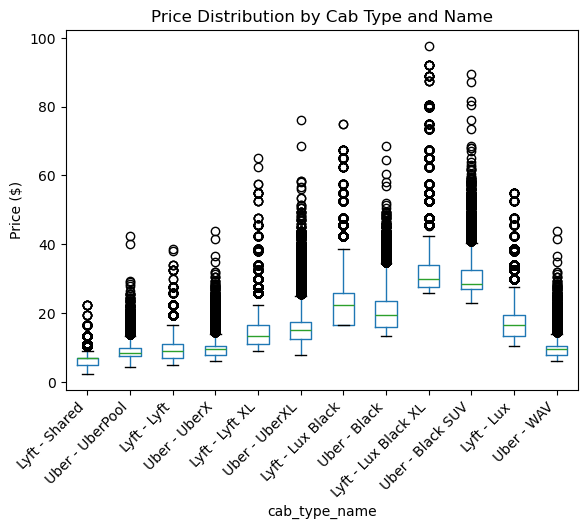

In [126]:
custom_order = ['Lyft - Shared', 'Uber - UberPool', 'Lyft - Lyft', 'Uber - UberX', 'Lyft - Lyft XL', 
                'Uber - UberXL', 'Lyft - Lux Black', 'Uber - Black', 'Lyft - Lux Black XL', 
                'Uber - Black SUV', 'Lyft - Lux', 'Uber - WAV']

# Create a new column combining 'cab_type' and 'name'
plot_data = updated_data.copy()
plot_data['cab_type_name'] = plot_data['cab_type'] + ' - ' + plot_data['name']

# Reorder the DataFrame based on the custom order
plot_data['cab_type_name'] = pd.Categorical(plot_data['cab_type_name'], categories=custom_order, ordered=True)
plot_data = plot_data.sort_values('cab_type_name')

# Create the box plot
plt.figure(figsize=(12, 6))
plot_data.boxplot(column='price', by='cab_type_name', grid=False)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.ylabel('Price ($)')
plt.title('Price Distribution by Cab Type and Name')
plt.suptitle('')  # Remove the automatic subtitle
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/price_by_car_type.png", bbox_inches='tight')
plt.show()


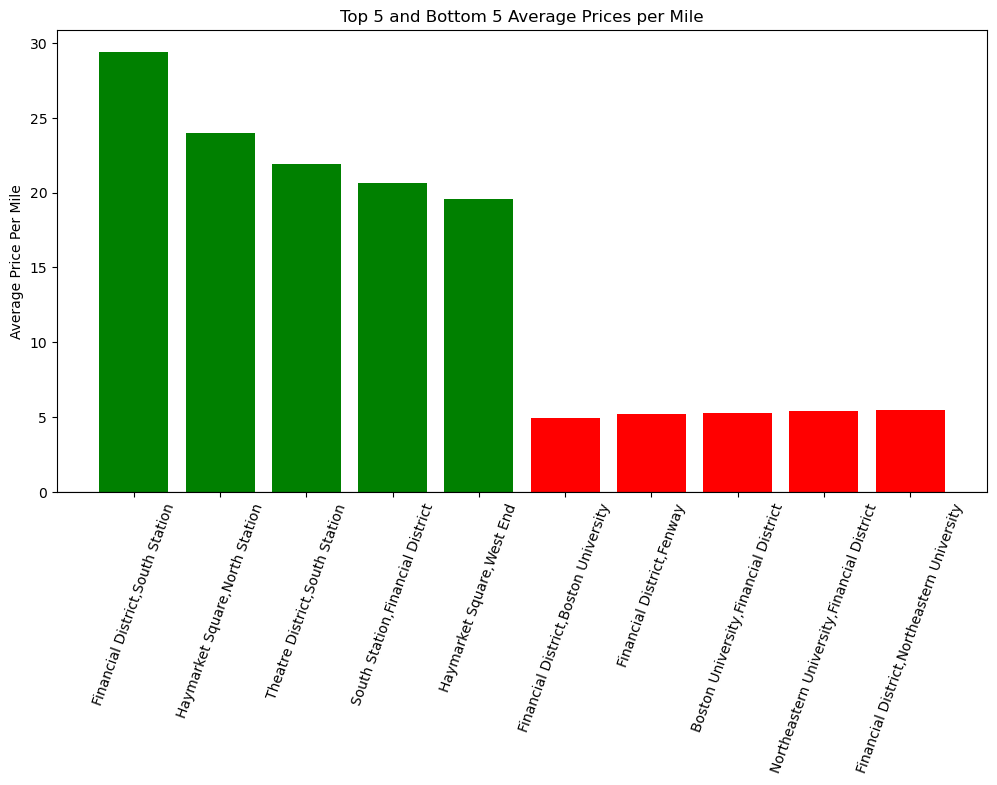

In [131]:
avg_price_per_mile = (
    updated_data.groupby(['source', 'destination'])
    .agg(avg_price=('price', 'mean'), avg_distance=('distance', 'mean'))  # Calculate both avg price and avg distance
    .reset_index()
)

avg_price_per_mile['avg_price_per_mile'] = avg_price_per_mile['avg_price'] / avg_price_per_mile['avg_distance']

# Sort by avg_price_per_mile in descending order
avg_price_per_mile = avg_price_per_mile.sort_values(by='avg_price_per_mile', ascending=False)

#Now we want to plot our top 5 and bottom 5 avg_price_per_miles
top5 = avg_price_per_mile.nlargest(5, 'avg_price_per_mile')
bottom5 = avg_price_per_mile.nsmallest(5, 'avg_price_per_mile')

combined = pd.concat([top5, bottom5])
combined['location'] = combined['source'] + ',' + combined['destination']

# Reset the index for plotting
combined.reset_index(drop=True, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(combined.index, combined['avg_price_per_mile'], color=['green'] * 5 + ['red'] * 5)

# Set x-ticks to the combined location labels
plt.xticks(combined.index, combined['location'], rotation=70)

# Add labels and title
plt.ylabel('Average Price Per Mile')
plt.title('Top 5 and Bottom 5 Average Prices per Mile')
plt.axhline(0, color='black', linewidth=0.8)
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/top5_and_bot5_price_per_mile.png", bbox_inches='tight')
plt.show()



Split then preprocess the data

Our data is balanced and doesn't have group structure. Our target variable is also continuous so we can use a basic train test split here

For the name variable we want to match up the level of car for each company so that the most basic car for each company get the same number. i.e lyft and uberX vehicles are both the most basic you can get so those will both be given the int 0 to represent them and so on. We will have to do this manually so this will have to be done before we split the data

In [34]:
print(updated_data.shape)
updated_data.head()

(637036, 12)


,hour,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,day_of_week
0,9,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,Sunday
1,2,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,Rain,Tuesday
2,1,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,Clear,Wednesday
3,4,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,Friday
4,3,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,Thursday


In [35]:
#Update the name column using name mapping
name_mapping = {
    'Lyft': 'Basic',
    'UberX': 'Basic',
    'Lyft XL': 'XL',
    'UberXL': 'XL',
    'Lux Black': 'Black',
    'Black' : 'Black',
    'UberPool' : 'Shared',
    'Lux Black XL' : 'Black_XL',
    'Black SUV' : 'Black_XL',
}

updated_data['car_type'] = updated_data['name'].replace(name_mapping)

updated_data = updated_data.drop(columns=['name'])

In [36]:
updated_data.shape

(637036, 12)

In [37]:
#Don't need datetime since we have day of the week and hour variables
Y = updated_data['price']
X = updated_data.drop(columns = ['price', 'datetime'])

Now we need to preprocess the data

In [38]:
ordinal_ftrs = ['car_type'] 
ordinal_cats = [['Shared','Basic', 'WAV', 'XL', 'Lux', 'Black', 'Black_XL']]
onehot_ftrs = ['source', 'destination', 'cab_type', 'day_of_week', 'short_summary', 'hour']
std_ftrs = ['distance', 'temperature', 'surge_multiplier']

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

preprocessor = ColumnTransformer(
    transformers = [
        ('ord', OrdinalEncoder(categories= ordinal_cats), ordinal_ftrs),
        ('one_hot', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)



In [40]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ParameterGrid

def MLpipe_RMSE(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data into train/val/test (60/20/20) and tunes hyperparameters 
    using a manual grid search over the given param_grid, and calculates the baseline RMSE

    In total it:
    1. Loops through 3 different random states
    2. Splits the data into train/val/test splits
    3. Evaluates all parameter combinations in param_grid on the validation set
    4. Selects the best parameters based on validation performance
    5. Evaluates the best model on the test set
    6. Returns a list of 3 test scores and 3 best parameter sets
    '''
    
    test_scores = []
    best_models = []
    baseline_scores = []

    for i in range(3):  # Loop through 4 random states
        print(f"Random state {i+1}")
        
        # Split data
        X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=i*21)
        X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=i*21)
        
        best_score = float('inf') 
        best_params = None
        best_model = None

        # Loop through all combinations of parameters in param_grid
        for params in ParameterGrid(param_grid):
            mod = ML_algo(**params)
            pipe = make_pipeline(preprocessor, mod)
            pipe.fit(X_train, y_train) 
            
            # Predict on validation set and calculate RMSE
            y_val_pred = pipe.predict(X_val)
            val_score = root_mean_squared_error(y_val, y_val_pred)
            
            # Update best model if validation score improves
            if val_score < best_score:
                best_score = val_score
                best_params = params
                best_model = pipe

        # Evaluate the best model on the test set
        y_test_pred = best_model.predict(X_test)
        test_score = root_mean_squared_error(y_test, y_test_pred)
        
        test_scores.append(test_score)
        best_models.append(best_params)

        baseline_pred = np.full_like(y_test, np.mean(y_train))  
        baseline_score = root_mean_squared_error(y_test, baseline_pred)
        baseline_scores.append(baseline_score)
        
        print(f"Baseline RMSE: {baseline_score:.4f}")
        print(f"Best model parameters: {best_params}")
        print(f"Validation RMSE: {best_score:.4f}")
        print(f"Test RMSE: {test_score:.4f}")

        model_filename = f"/Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_{str(ML_algo.__name__)}_mod_rstate_{i+1}.pkl"
        joblib.dump(best_model, model_filename)
        print(f"Saved best model for random state {i+1} at: {model_filename}")
    
    return test_scores, baseline_scores, best_models


In [41]:
from sklearn.linear_model import Lasso 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [42]:
ML_algo = Lasso
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
scores_lasso, baseline_lasso, models_lasso = MLpipe_RMSE(X, Y, preprocessor, ML_algo, param_grid_lasso)
print(f"Mean of test scores {np.mean(scores_lasso)}")
print(f"Standard deviation of test scores: {np.std(scores_lasso)}")

Random state 1
Baseline RMSE: 9.3263
Best model parameters: {'alpha': 0.01}
Validation RMSE: 3.4925
Test RMSE: 3.4956
Saved best model for random state 1 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_Lasso_mod_rstate_1.pkl
Random state 2
Baseline RMSE: 9.3340
Best model parameters: {'alpha': 0.01}
Validation RMSE: 3.4928
Test RMSE: 3.5057
Saved best model for random state 2 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_Lasso_mod_rstate_2.pkl
Random state 3
Baseline RMSE: 9.3302
Best model parameters: {'alpha': 0.01}
Validation RMSE: 3.4832
Test RMSE: 3.4987
Saved best model for random state 3 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_Lasso_mod_rstate_3.pkl
Mean of test scores 3.500002196706127
Standard deviation of test scores: 0.004223702493595279


In [43]:
ML_algo = KNeighborsRegressor
param_grid = {'n_neighbors': [2, 5, 15]}
scores_knn, baseline_knn, models_knn = MLpipe_RMSE(X, Y, preprocessor, ML_algo, param_grid)
print(f"Mean of test scores K Neighbors: {np.mean(scores_knn)}")
print(f"Standard deviation of test scores K Neighbors: {np.std(scores_knn)}")

Random state 1
Baseline RMSE: 9.3263
Best model parameters: {'n_neighbors': 15}
Validation RMSE: 2.2186
Test RMSE: 2.2287
Saved best model for random state 1 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_KNeighborsRegressor_mod_rstate_1.pkl
Random state 2
Baseline RMSE: 9.3340
Best model parameters: {'n_neighbors': 15}
Validation RMSE: 2.2177
Test RMSE: 2.2369
Saved best model for random state 2 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_KNeighborsRegressor_mod_rstate_2.pkl
Random state 3
Baseline RMSE: 9.3302
Best model parameters: {'n_neighbors': 15}
Validation RMSE: 2.1974
Test RMSE: 2.2198
Saved best model for random state 3 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_KNeighborsRegressor_mod_rstate_3.pkl
Mean of test scores K Neighbors: 2.2284652755384116
Standard deviation of test scores K Neighbors: 0.00695412002721632


In [44]:
ML_algo = XGBRegressor
param_grid_xgr = {'max_depth': [1, 5, 15],
              'n_estimators': [5, 40, 100],
              'learning_rate': [0.01, 0.1],
              'subsample': [0.75, 1.0],
              'random_state': [21]}

scores_xgr, baseline_xgr, models_xgr = MLpipe_RMSE(X, Y, preprocessor, ML_algo, param_grid_xgr)

print(f"Mean of test scores XGBRegressor: {np.mean(scores_xgr)}")
print(f"Standard deviation of test scores XGBRegressor: {np.std(scores_xgr)}")

Random state 1
Baseline RMSE: 9.3263
Best model parameters: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 40, 'random_state': 21, 'subsample': 0.75}
Validation RMSE: 1.6855
Test RMSE: 1.6981
Saved best model for random state 1 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_XGBRegressor_mod_rstate_1.pkl
Random state 2
Baseline RMSE: 9.3340
Best model parameters: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 40, 'random_state': 21, 'subsample': 0.75}
Validation RMSE: 1.6824
Test RMSE: 1.6942
Saved best model for random state 2 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_XGBRegressor_mod_rstate_2.pkl
Random state 3
Baseline RMSE: 9.3302
Best model parameters: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 40, 'random_state': 21, 'subsample': 0.75}
Validation RMSE: 1.6590
Test RMSE: 1.6930
Saved best model for random state 3 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_XGBRegressor_

In [45]:
ML_algo = RandomForestRegressor
param_grid_rf = {'max_depth': [1, 5, 15],
              'n_estimators': [5, 40, 100],
              'random_state': [21]}
scores_rf, baseline_rf, models_rf = MLpipe_RMSE(X, Y, preprocessor, ML_algo, param_grid_rf)
print(f"Mean of test scores Random Forest: {np.mean(scores_rf)}")
print(f"Standard deviation of test scores Random Forest: {np.std(scores_rf)}")

Random state 1
Baseline RMSE: 9.3263
Best model parameters: {'max_depth': 15, 'n_estimators': 100, 'random_state': 21}
Validation RMSE: 1.6644
Test RMSE: 1.6757
Saved best model for random state 1 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_RandomForestRegressor_mod_rstate_1.pkl
Random state 2
Baseline RMSE: 9.3340
Best model parameters: {'max_depth': 15, 'n_estimators': 100, 'random_state': 21}
Validation RMSE: 1.6601
Test RMSE: 1.6740
Saved best model for random state 2 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_RandomForestRegressor_mod_rstate_2.pkl
Random state 3
Baseline RMSE: 9.3302
Best model parameters: {'max_depth': 15, 'n_estimators': 100, 'random_state': 21}
Validation RMSE: 1.6397
Test RMSE: 1.6699
Saved best model for random state 3 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_RandomForestRegressor_mod_rstate_3.pkl
Mean of test scores Random Forest: 1.673235684837149
Standard deviation of t

Best Model is Random Forest with a mean RMSE of 1.67

Now we can calculate the baseline RMSE and compare our models to it.

In [43]:
baseline_pred = np.full_like(Y, np.mean(Y), dtype=np.float64)  

baseline_rmse = root_mean_squared_error(Y, baseline_pred)

print(f"Baseline RMSE: {baseline_rmse:.4f}")

Baseline RMSE: 9.3259


In [47]:
results = []

# Dictionary containing scores for each model and their corresponding baseline scores
models_dict = {
    'Lasso': {'scores': scores_lasso, 'baseline_scores': baseline_lasso},
    'KNeighbors': {'scores': scores_knn, 'baseline_scores': baseline_knn},
    'XGBoost': {'scores': scores_xgr, 'baseline_scores': baseline_xgr},
    'RandomForest': {'scores': scores_rf, 'baseline_scores': baseline_rf}
}

# Loop through each model's scores and baseline scores to compute the required metrics
for model_name, data in models_dict.items():
    scores = data['scores']
    baseline_scores = data['baseline_scores']
    
    mean_rmse = np.mean(scores)
    std_rmse = np.std(scores)
    mean_baseline_rmse = np.mean(baseline_scores)
    std_baseline_rmse = np.std(baseline_scores)
    
    # Calculate std_above_baseline
    std_above_baseline = (mean_baseline_rmse - mean_rmse) / std_baseline_rmse
    
    # Append results to the list
    results.append({
        'model': model_name,
        'mean_rmse': mean_rmse,
        'std_rmse': std_rmse,
        'mean_baseline_rmse': mean_baseline_rmse,
        'std_baseline_rmse': std_baseline_rmse,
        'std_above_baseline': std_above_baseline
    })

# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


          model  mean_rmse  std_rmse  mean_baseline_rmse  std_baseline_rmse  \
0         Lasso   3.500002  0.004224            9.330152           0.003124   
1    KNeighbors   2.228465  0.006954            9.330152           0.003124   
2       XGBoost   1.695119  0.002185            9.330152           0.003124   
3  RandomForest   1.673236  0.002445            9.330152           0.003124   

   std_above_baseline  
0         1866.440139  
1         2273.504753  
2         2444.248057  
3         2451.253676  


Feature Importance: Global

In [44]:
#Need to get the feature names for our shap plots
feature_names = []

for name, transformer, columns in preprocessor.transformers_:
    if hasattr(transformer, 'get_feature_names_out'):  # Transformers like OneHotEncoder
        names = transformer.get_feature_names_out(columns)
    else:  # Transformers like StandardScaler or passthrough
        names = columns
    feature_names.extend(names)

#Need to split the data for that random state and preprocess again to get the right data for our plots
random_state = 42  
X_train, X_other, y_train, y_other = train_test_split(X, Y, test_size=0.4, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=random_state)
X_train_trans = preprocessor.fit_transform(X_train)
X_val_trans = preprocessor.transform(X_val)
X_test_trans = preprocessor.transform(X_test)

In [ ]:
import shap
import matplotlib.pyplot as plt
import joblib
import numpy as np

# Load the best models for the 3rd random state
lasso_model = joblib.load('/Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_Lasso_mod_rstate_3.pkl')
kn_model = joblib.load('/Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_KNeighborsRegressor_mod_rstate_3.pkl')
rf_model = joblib.load('/Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_RandomForestRegressor_mod_rstate_3.pkl')
xgb_model = joblib.load('/Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_XGBRegressor_mod_rstate_3.pkl')

# Extract the actual models from the pipelines
rf_actual_model = rf_model.named_steps['randomforestregressor']
xgb_actual_model = xgb_model.named_steps['xgbregressor']
lasso_actual_model = lasso_model.named_steps['lasso']
kn_actual_model = kn_model.named_steps['kneighborsregressor']

random_state = 42  

# Sample from the test data since the dataset is very large
X_sample = shap.sample(X_test_trans, 1000, random_state=random_state)

# For Random Forest
explainer_rf = shap.TreeExplainer(rf_actual_model)
shap_values_rf = explainer_rf.shap_values(X_sample)
shap.summary_plot(shap_values_rf, X_sample, feature_names=feature_names, show=False)
plt.title("Random Forest")
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/rf_shap_plot.png", bbox_inches='tight')
plt.clf() 

# For XGBoost
explainer_xgb = shap.TreeExplainer(xgb_actual_model)
shap_values_xgb = explainer_xgb.shap_values(X_sample)
shap.summary_plot(shap_values_xgb, X_sample, feature_names=feature_names, show=False)
plt.title("XGBoost")
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/xgb_shap_plot.png", bbox_inches='tight')
plt.clf() 


<Figure size 800x950 with 0 Axes>

In [ ]:
# For Lasso
explainer_lasso = shap.Explainer(lasso_actual_model, X_sample)
shap_values_lasso = explainer_lasso(X_sample)
shap.summary_plot(shap_values_lasso, X_sample, feature_names=feature_names, show=False)
plt.title("Lasso")
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/lasso_shap_plot.png", bbox_inches='tight')  
plt.clf()  

<Figure size 800x950 with 0 Axes>

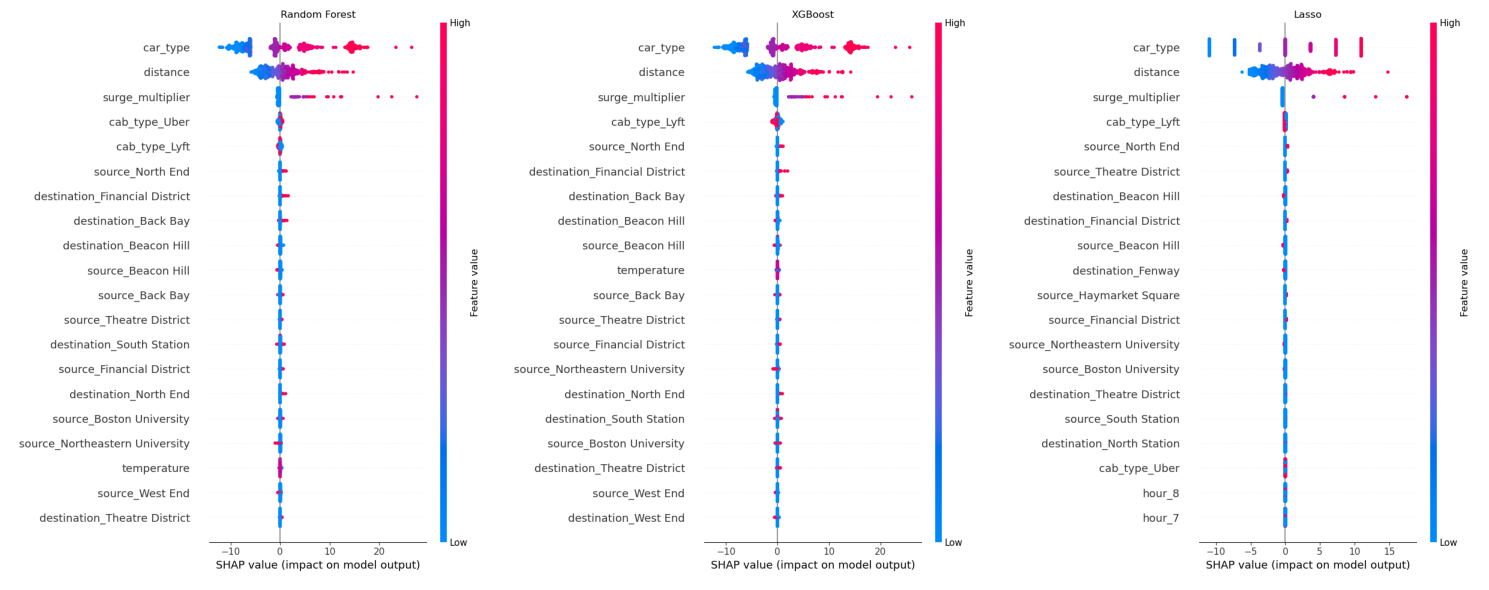

In [ ]:
import matplotlib.image as mpimg

# Paths to the saved SHAP plots
shap_plot_paths = [
    '/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/rf_shap_plot.png',  
    '/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/xgb_shap_plot.png',  
    '/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/lasso_shap_plot.png',
]

fig, axes = plt.subplots(1, 3, figsize=(15, 12))

for i, ax in enumerate(axes.flat):
    img = mpimg.imread(shap_plot_paths[i])  
    ax.imshow(img)  
    ax.axis('off')  

plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/combined_shap_plot.png", bbox_inches='tight')  
plt.tight_layout()
plt.show()

In [51]:
#random forest feature importance
importances = rf_actual_model.feature_importances_

# Printing feature importances
print("Feature Importances:")
print(importances)

# Create a DataFrame to make it easier to view
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print(feature_importances_df)


Feature Importances:
[7.84252649e-01 4.06949589e-04 3.68890676e-04 3.16986532e-04
 1.61715407e-04 2.02655746e-04 5.44212440e-05 3.82995422e-04
 1.09365465e-04 2.42045641e-04 1.49658546e-04 1.41597906e-04
 1.72764849e-04 5.38507439e-04 2.76187992e-04 1.16713436e-04
 1.06715935e-04 5.84470898e-04 5.63587039e-05 1.84278563e-04
 1.41490777e-04 1.59057034e-04 4.25060098e-04 1.47421047e-04
 1.41715625e-04 2.79341261e-03 3.10914328e-03 1.94176258e-04
 1.16795482e-04 1.60161591e-04 1.23174578e-04 1.23123304e-04
 1.27078409e-04 1.17865162e-04 8.71320145e-05 6.27703320e-05
 2.95959470e-05 8.94169782e-05 1.34688798e-04 1.53414178e-04
 1.22281957e-04 6.40621832e-05 7.05236163e-05 9.38959261e-05
 1.00842247e-04 7.37164501e-05 7.89572431e-05 8.11572133e-05
 7.92540449e-05 6.01533289e-05 6.68127363e-05 7.41288484e-05
 7.08315195e-05 7.88008219e-05 9.99511184e-05 8.48647545e-05
 8.61771300e-05 1.14672268e-04 9.01239209e-05 6.52174341e-05
 1.27823768e-04 7.16813423e-05 8.94783340e-05 9.35443722e-05
 7.

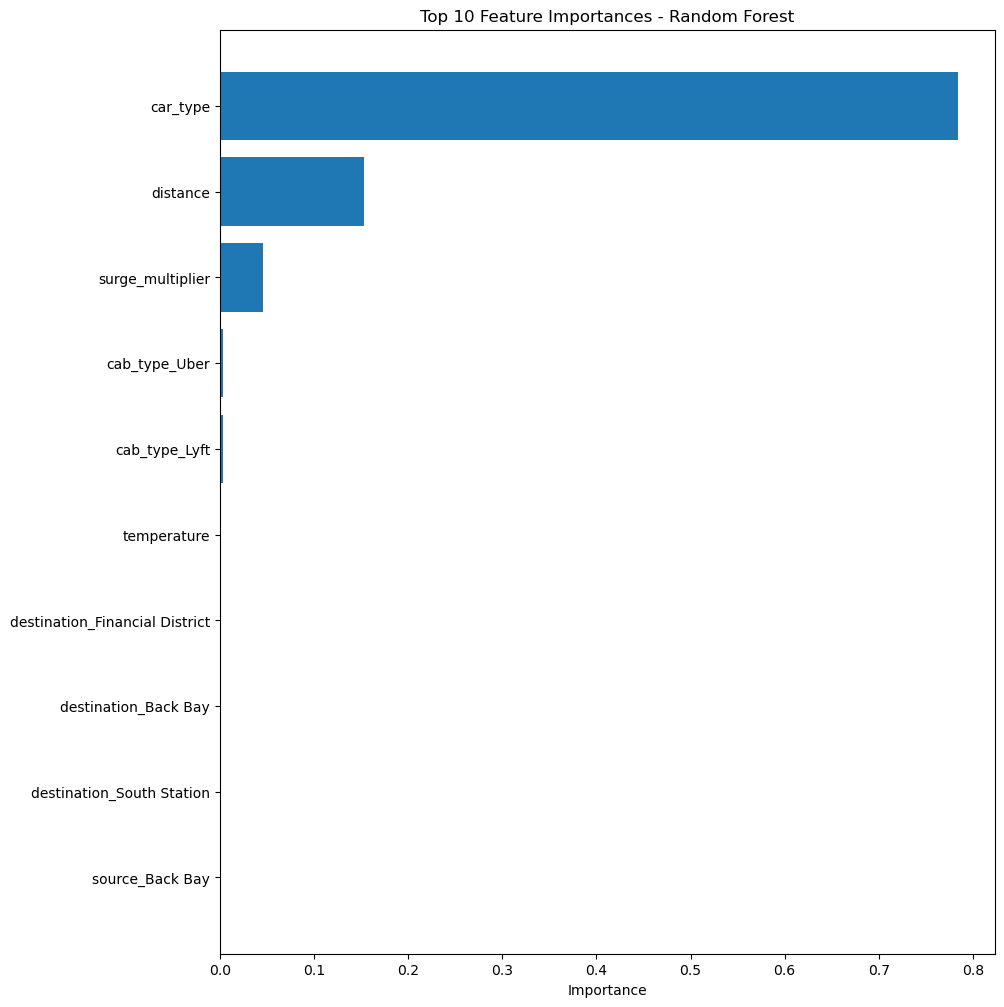

In [128]:

top_10_features = feature_importances_df.nlargest(10, 'Importance')

plt.figure(figsize=(10, 12))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.gca().invert_yaxis()  # Ensure the most important feature is at the top
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/feature_importance_rf_top10.png", bbox_inches='tight')
plt.show()



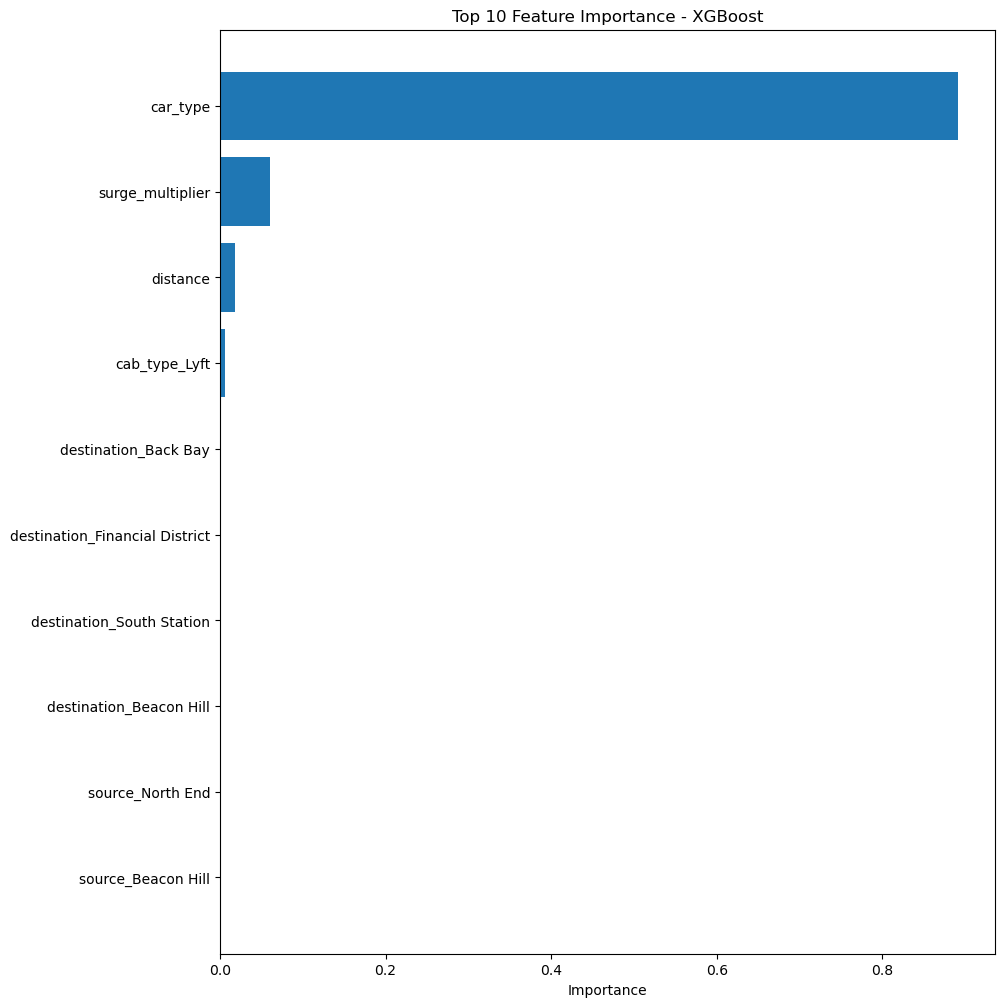

In [129]:
xgb_importances = xgb_actual_model.feature_importances_

# Create a DataFrame to store feature names and their importance values
feature_importances_df_xgb = pd.DataFrame({
    'Feature': feature_names,  # feature names must match the order of the features
    'Importance': xgb_importances
})

# Select top 10 features by importance
top_10_features_xgb = feature_importances_df_xgb.nlargest(10, 'Importance')

# Create a horizontal bar chart to visualize the top 10 feature importance
plt.figure(figsize=(10, 12))
plt.barh(top_10_features_xgb['Feature'], top_10_features_xgb['Importance'])

# Invert the y-axis so the most important feature is at the top
plt.gca().invert_yaxis()

# Adding labels and title
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance - XGBoost')
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/feature_importance_xg_top10.png", bbox_inches='tight')
# Display the plot
plt.show()


Local Shap plot to help explain features

In [54]:
index = 32
print(explainer_lasso.expected_value)  
shap_values_for_instance = shap_values_lasso[index].values
shap.force_plot(explainer_lasso.expected_value, shap_values_for_instance, features=X_sample[index,:] , feature_names=feature_names)

16.780461915889102


In [55]:
index = 32
print(explainer_rf.expected_value)  
shap_values_for_instance = shap_values_rf[index] 
shap.force_plot(explainer_rf.expected_value, shap_values_for_instance, features=X_sample[index, :] , feature_names=feature_names)


[16.55810666]


In [56]:
index = 32
print(explainer_xgb.expected_value)  
shap_values_for_instance = shap_values_xgb[index] 
shap.force_plot(explainer_xgb.expected_value, shap_values_for_instance, features=X_sample[index, :] , feature_names=feature_names)

16.549873


In [57]:
index = 32
print(explainer_xgb.expected_value)

# Get SHAP values for the instance
shap_values_for_instance = shap_values_xgb[index]

# Generate the force plot
force_plot = shap.force_plot(explainer_xgb.expected_value, shap_values_for_instance, 
                             features=X_sample[index, :] , feature_names=feature_names)

force_plot_html = '/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/xgb_force_plot_index_32.html'
shap.save_html(force_plot_html, force_plot)


16.549873
